# Data Pre-Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from churn_ml_project.data_loader import load_telco_data


In [4]:
data_path = '../data/dataset.csv' 
df = load_telco_data(data_path)

Veri seti başarıyla yüklendi. Boyut: (7043, 21)


In [5]:
print(f"Data shape: {df.shape}")
df.head()

Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Total Charges değişkeni object olarak gözüküyor ama aslında sayısal bir değişken
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.dtypes["TotalCharges"]

dtype('float64')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


## Exploring Data

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# SeniorCitizen int64 olarak işaretlenmiş fakat binary bir değişken o yüzden numeric features listesinden remove edeceğim
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
if "SeniorCitizen" in numeric_features:
    numeric_features.remove("SeniorCitizen")
print(f"Numeric features: {numeric_features}")

Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
if "customerID" in categorical_features:
    categorical_features.remove("customerID") #customerID  kişiye özel unique olduğu 
categorical_features.append("SeniorCitizen") 

In [13]:
print(f"Categorical features: {categorical_features}")
print(f"Numeric features: {numeric_features}")

Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [14]:
for col in categorical_features:
    print(df[col].value_counts())
    print("-----")

gender
Male      3555
Female    3488
Name: count, dtype: int64
-----
Partner
No     3641
Yes    3402
Name: count, dtype: int64
-----
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-----
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-----
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
-----
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
-----
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
-----
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
-----
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
-----
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, 

In [15]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("-----")

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
-----
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
-----
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
-----
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
-----
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64
-----
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64
-----
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64
-----
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: proportion, dtype: float64
-----
DeviceProtection
No                     43.944342
Yes                    34.388755
No inte

#### Insights
* customerID kişiye özel bir değişken olduğu için çıkardım
* Target değişkenin sınıf dağılımı dengesiz, modellemede ele alınması gerekir.
* TotalCharges değişkeninde 11 adet eksik değer var, ön işlemede ele alınacak.
* Cinsiyet dengeli, SeniorCitizen ve dependents ise azınlıkta, Electronic check ise en yaygın ödeme yöntemi.

### Univariate Analysis

#### Univariate Analysis for Numerical Features

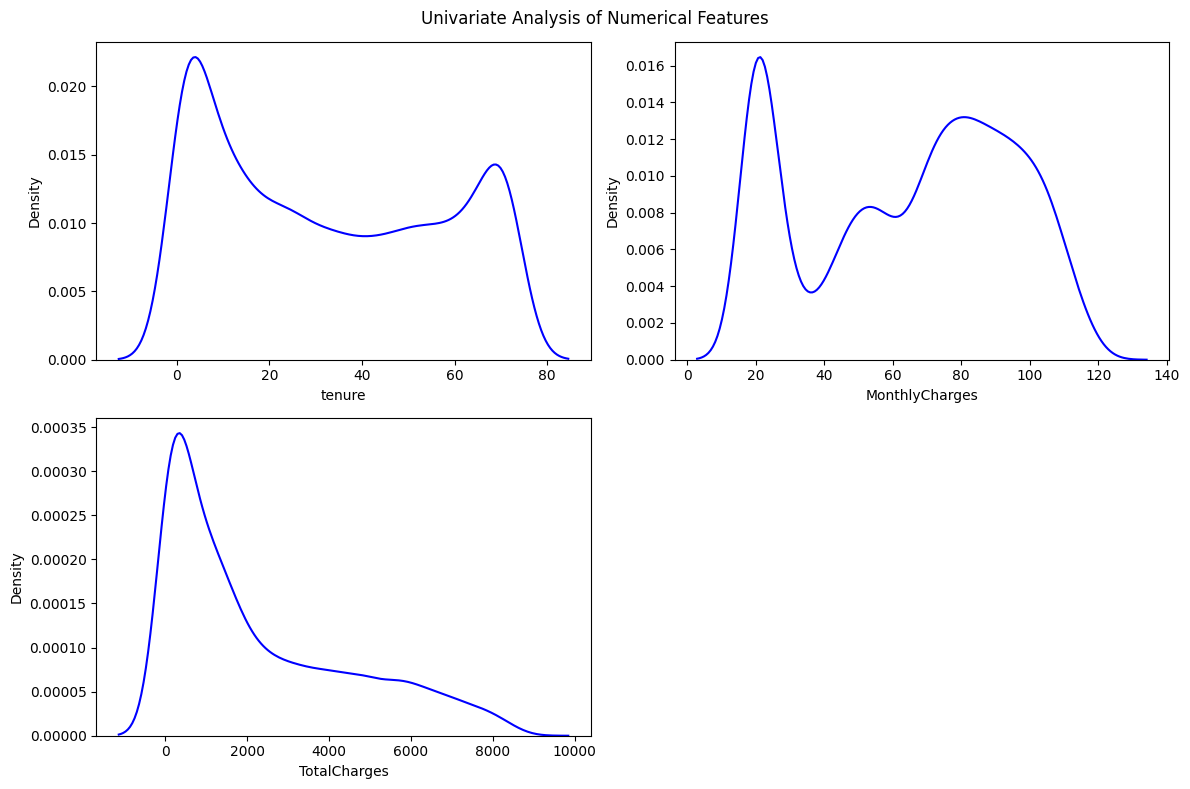

In [16]:
plt.figure(figsize=(12, 8))
plt.suptitle("Univariate Analysis of Numerical Features")

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

* total charges: şiddetli sağa çarpık bir dağılıma sahip
* tenure: iki tepe noktası var, biri sıfıra yakın diğeri ise 70 civarında (yeni müşteriler ve uzun süreli müşteriler)
* montlycharges: dağılım cok modlu

### Univariate Analysis for Categorical Features

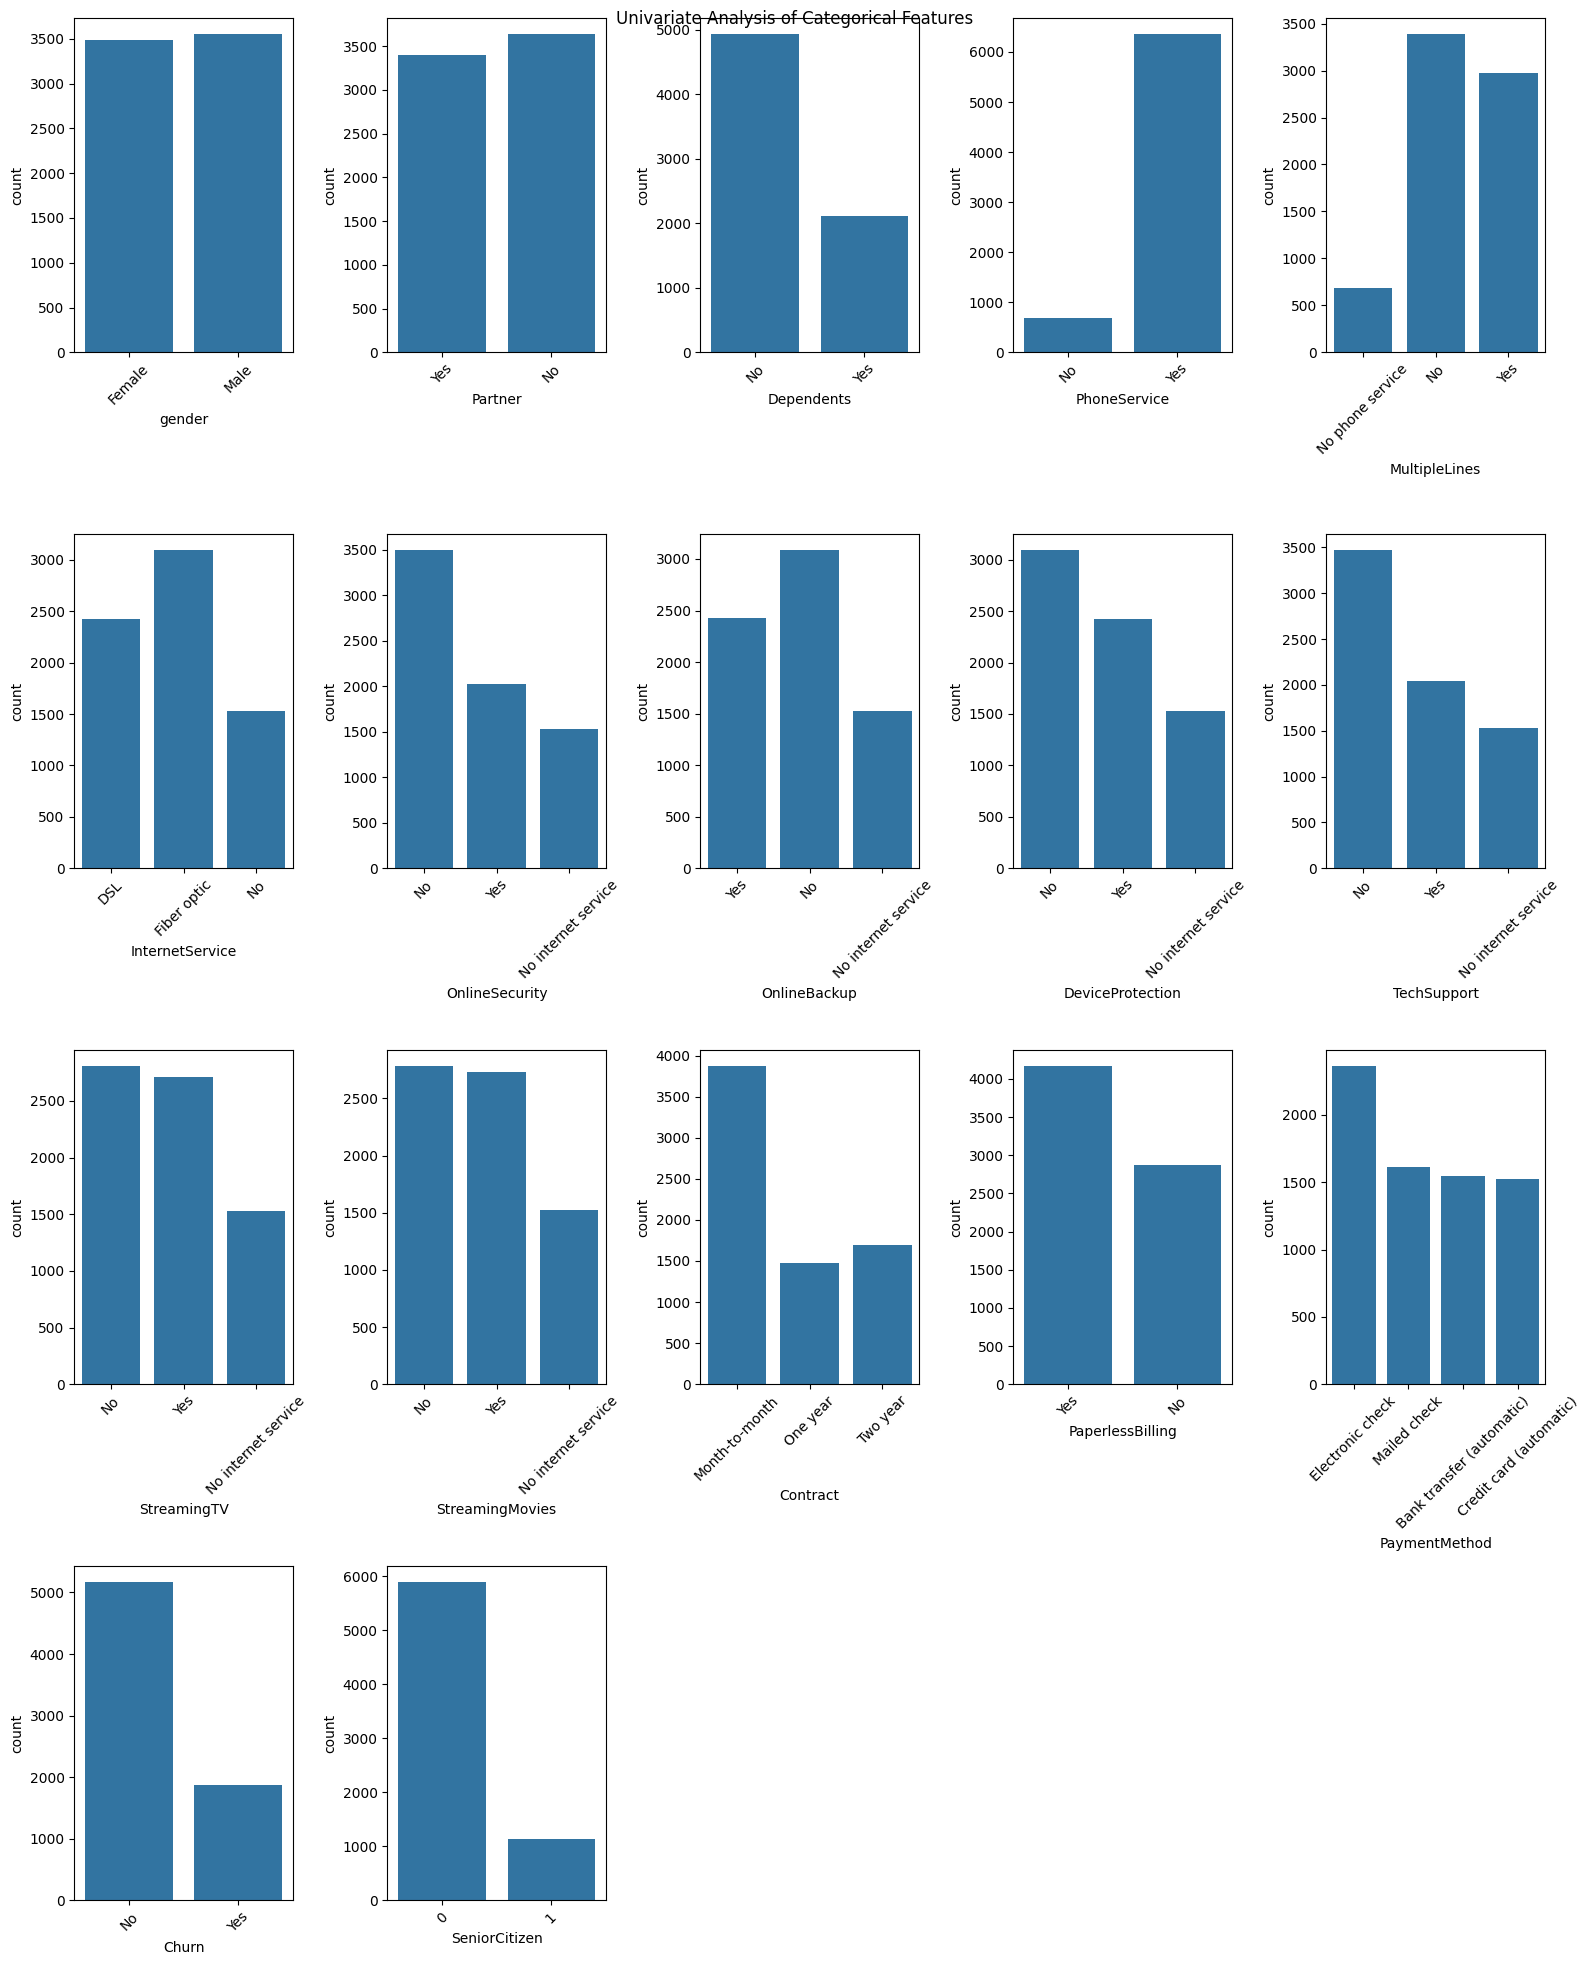

In [17]:
plt.figure(figsize=(16, 20))
plt.suptitle("Univariate Analysis of Categorical Features")

for i in range(0, len(categorical_features)):
    plt.subplot(4, 5, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    

## Multivariate Analysis

### Chi Square Test for Categorical Features
* Kategorik değişkenlerin target değişken "churn" ile ilişkisi
* Ki - kare testi ile istatistiksel anlamlılık
* İlişkinin güçü -> Cramers V
* Sıfır hipotezi : Değişken ile Target değişken arasında ilişki yoktur.

In [18]:
from scipy.stats import chi2_contingency

#Cramer V 
def cramers_v(confusion_matrix):
    chi2_contingency(confusion_matrix)[0]
    n= confusion_matrix.sum().sum()
    phi2=chi2/n
    r, k= confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

print(f"{'Değişken':<20} | {'p-değeri':<10} | {'Cramer’s V'}")
print("-" * 45)

for col in categorical_features:
    if col == 'Churn':  # hedef değişkenle kendisini karşılaştırma
        continue
    tablo = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(tablo)
    v = cramers_v(tablo)
    print(f"{col:<20} | {p:<10.4f} | {v:.3f}")

Değişken             | p-değeri   | Cramer’s V
---------------------------------------------
gender               | 0.4866     | 0.008
Partner              | 0.0000     | 0.150
Dependents           | 0.0000     | 0.164
PhoneService         | 0.3388     | 0.011
MultipleLines        | 0.0035     | 0.040
InternetService      | 0.0000     | 0.322
OnlineSecurity       | 0.0000     | 0.347
OnlineBackup         | 0.0000     | 0.292
DeviceProtection     | 0.0000     | 0.282
TechSupport          | 0.0000     | 0.343
StreamingTV          | 0.0000     | 0.231
StreamingMovies      | 0.0000     | 0.231
Contract             | 0.0000     | 0.410
PaperlessBilling     | 0.0000     | 0.191
PaymentMethod        | 0.0000     | 0.303
SeniorCitizen        | 0.0000     | 0.150


### Distribution of Numerical Features

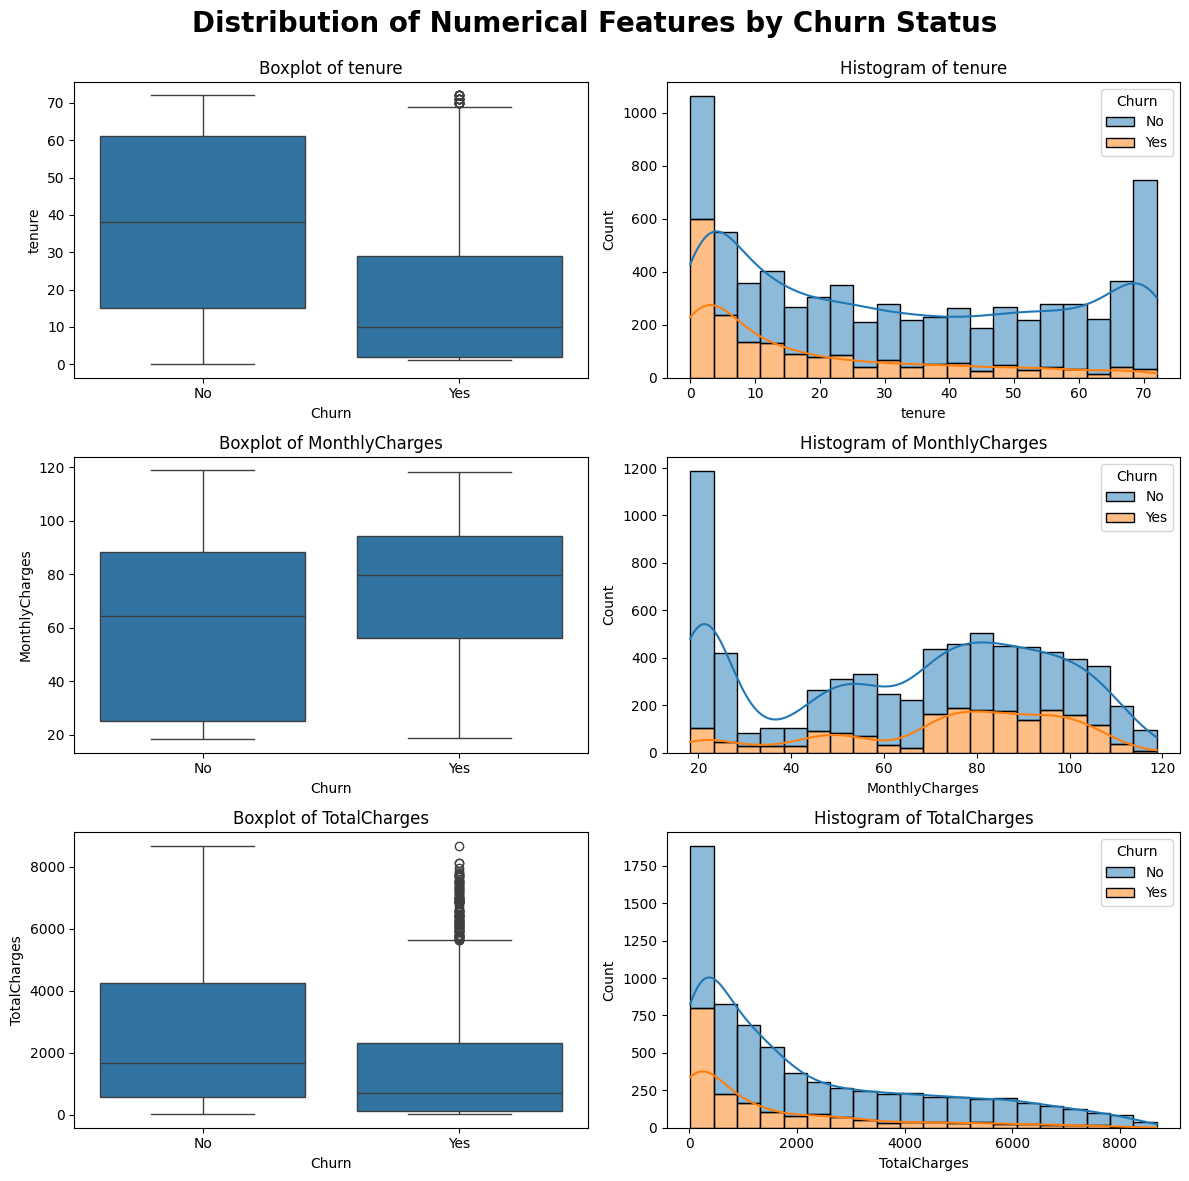

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

fig.suptitle('Distribution of Numerical Features by Churn Status', fontsize=20, fontweight='bold', ha='center')        

for i, col in enumerate(numeric_features):   
    sns.boxplot(data=df, x='Churn', y=col, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True,multiple='stack', ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


* Sayısal değişkenlerin dağılımlarına bakıldığında, değişkenler normal dağılım göstermiyor.
* Özellikle histogramlar sağa çarpık (right-skewed) yapıdadır ve boxplot'larda aykırı değerler mevcuttur. 

#### Mann Whitney U Testi
* Sayısal değişkenlerin Churn durumuna göre dağılımlarının istatistiksel olarak anlamlılığına bakacağız (veriler normal dağılım göstermediği için man whitney kullanıyoruz.)
* Sıfır hipotezi : İki grup arasında dağılım farkı yokturç

In [28]:
from scipy.stats import mannwhitneyu

print(f"{'Değişken':<20} | {'p-değeri':<10}")
print("-" * 35)

for col in numeric_features:
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()
    stat, p = mannwhitneyu(churn_yes, churn_no)
    print(f"{col:<20} | {p:<10.4f}")


Değişken             | p-değeri  
-----------------------------------
tenure               | 0.0000    
MonthlyCharges       | 0.0000    
TotalCharges         | 0.0000    


* Tüm değişkenler için p değeri 0.05 den küçük.
* Yani churn edenler ve etmeyenler arasında istatistiksel olarak anlamlı fark vardır. 
* Bu değişkenlerin churn ile ilişkili olmalı ihtimali yüksek yorumu yapılabilir


## 5. Churn Analizi ve Özellik Etkileşimleri


### 5.1 Churn Dağılımı (Pie Chart)


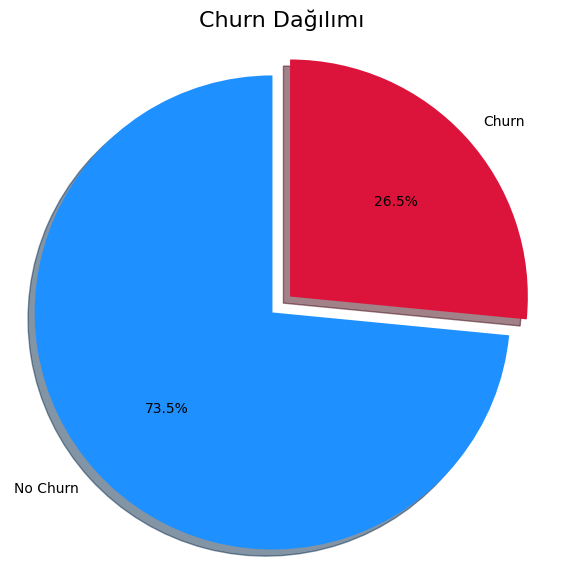

In [29]:
labels = ['No Churn', 'Churn']
sizes = df['Churn'].value_counts(normalize=True) * 100
explode = (0, 0.1)  
colors = ['#1E90FF', '#DC143C']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,
        startangle=90, colors=colors)
plt.title('Churn Dağılımı', fontsize=16)
plt.axis('equal')
plt.show()


### 5.2 Contract Değişkeninin Churn Üzerindeki Etkisi


In [31]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100

proportion
Contract       Churn            
Month-to-month No      57.290323
               Yes     42.709677
One year       No      88.730482
               Yes     11.269518
Two year       No      97.168142
               Yes      2.831858

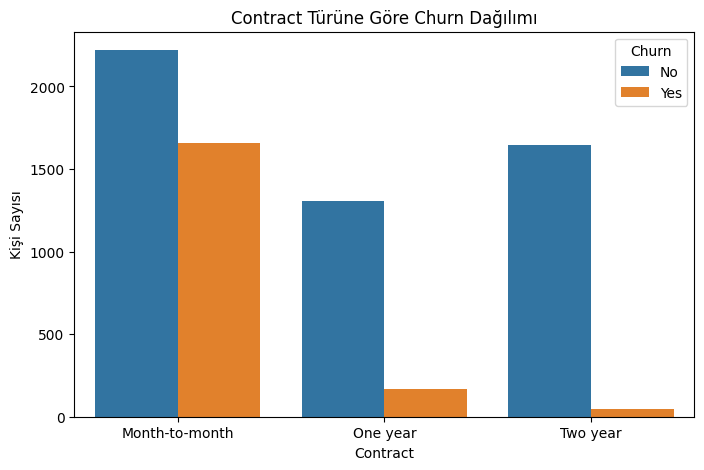

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Türüne Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("Contract")
plt.xticks(rotation=0)
plt.show()


### 5.3 OnlineSecurity Değişkeninin Churn Üzerindeki Etkisi


In [33]:
df.groupby("OnlineSecurity")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
OnlineSecurity      Churn            
No                  No      58.233276
                    Yes     41.766724
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      85.388806
                    Yes     14.611194

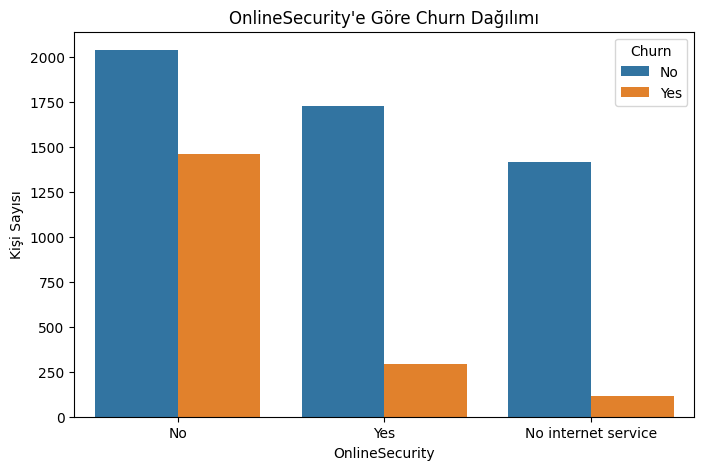

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)
plt.title("OnlineSecurity'e Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("OnlineSecurity")
plt.show()


### 5.4 TechSupport Değişkeninin Churn Üzerindeki Etkisi

In [35]:
df.groupby("TechSupport")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
TechSupport         Churn            
No                  No      58.364526
                    Yes     41.635474
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      84.833659
                    Yes     15.166341

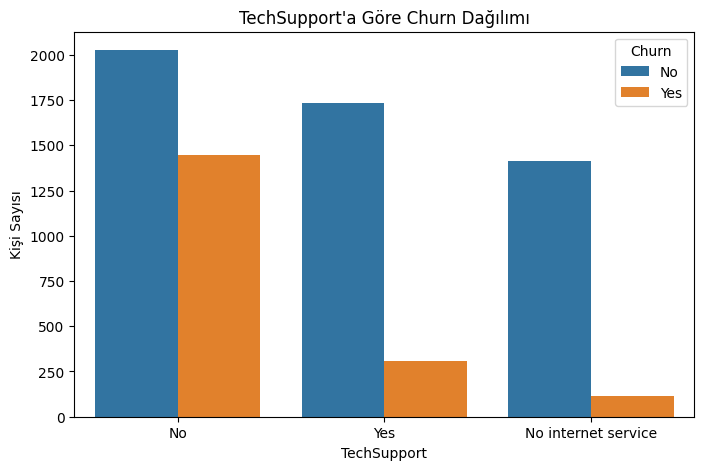

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x="TechSupport", hue="Churn", data=df)
plt.title("TechSupport'a Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("TechSupport")
plt.show()


### 5.5 InternetService Değişkeninin Churn Üzerindeki Etkisi


In [37]:
df.groupby("InternetService")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
InternetService Churn            
DSL             No      81.040892
                Yes     18.959108
Fiber optic     No      58.107235
                Yes     41.892765
No              No      92.595020
                Yes      7.404980

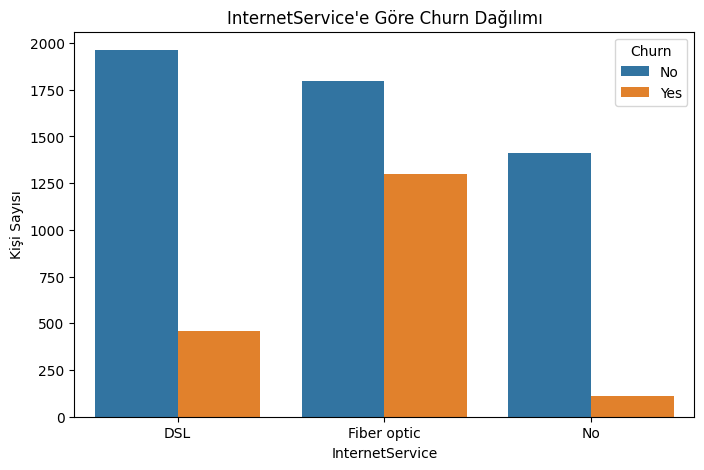

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("InternetService'e Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("InternetService")
plt.show()


### 5.6 PaymentMethod Değişkeninin Churn Üzerindeki Etkisi

In [39]:
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
PaymentMethod             Churn            
Bank transfer (automatic) No      83.290155
                          Yes     16.709845
Credit card (automatic)   No      84.756899
                          Yes     15.243101
Electronic check          No      54.714588
                          Yes     45.285412
Mailed check              No      80.893300
                          Yes     19.106700

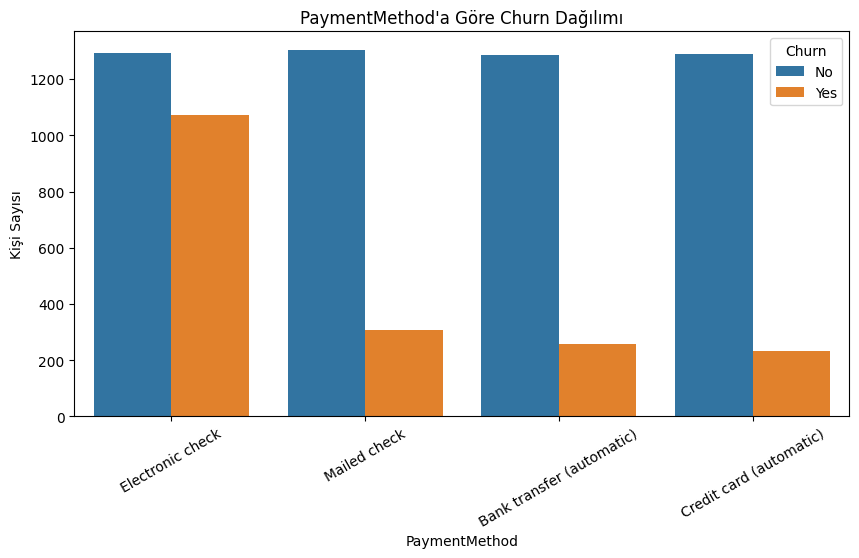

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("PaymentMethod'a Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("PaymentMethod")
plt.xticks(rotation=30)
plt.show()


### 5.7 DeviceProtection Değişkeninin Churn Üzerindeki Etkisi


In [41]:
df.groupby("DeviceProtection")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
DeviceProtection    Churn            
No                  No      60.872375
                    Yes     39.127625
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      77.497936
                    Yes     22.502064

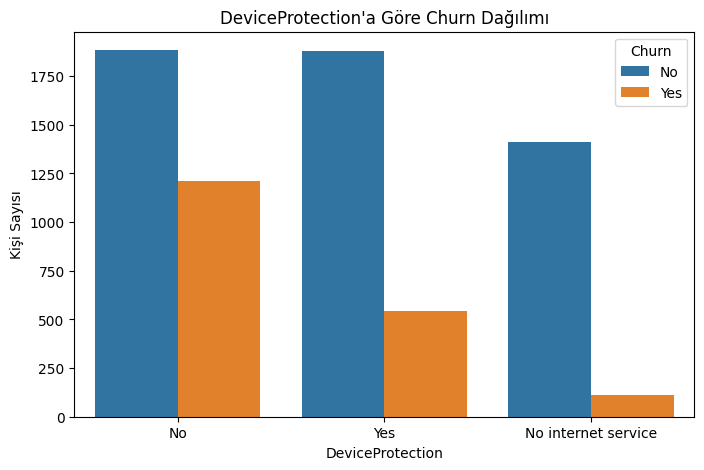

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x="DeviceProtection", hue="Churn", data=df)
plt.title("DeviceProtection'a Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("DeviceProtection")
plt.show()


### 5.8 OnlineBackUp Değişkeninin Churn Üzerindeki Etkisi


In [43]:
df.groupby("OnlineBackup")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
OnlineBackup        Churn            
No                  No      60.071244
                    Yes     39.928756
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      78.468506
                    Yes     21.531494

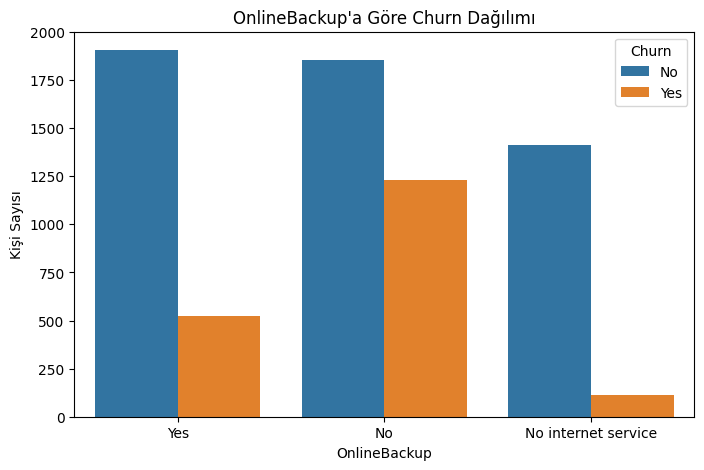

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x="OnlineBackup", hue="Churn", data=df)
plt.title("OnlineBackup'a Göre Churn Dağılımı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("OnlineBackup")
plt.show()


#### 5.9 StreaminTV Değişkenin Churn üzerindeki etkisi

In [45]:
df.groupby("StreamingTV")["Churn"].value_counts(normalize=True).to_frame().rename(columns={"Churn": "proportion"}) * 100


proportion
StreamingTV         Churn            
No                  No      66.476868
                    Yes     33.523132
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      69.929812
                    Yes     30.070188

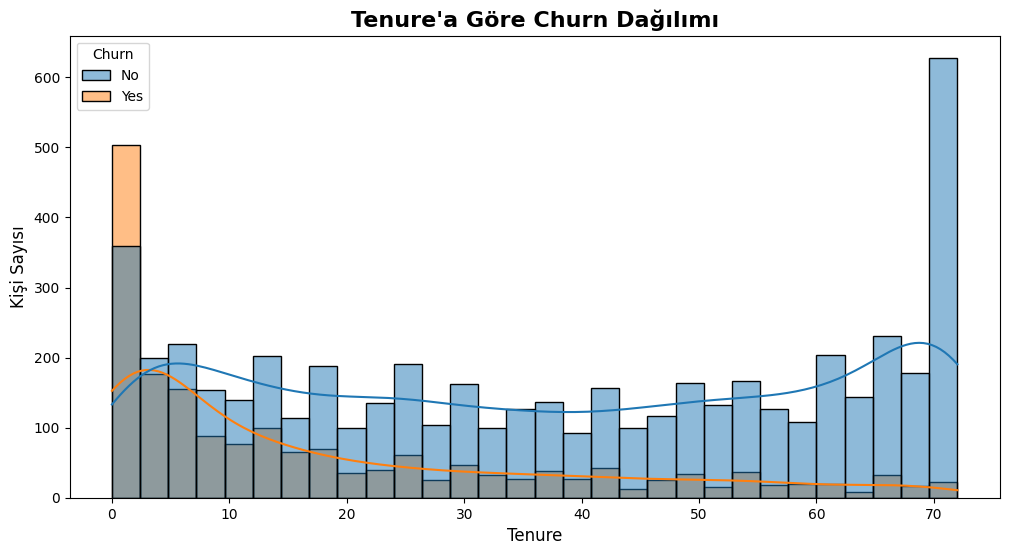

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(x="tenure", hue="Churn", data=df, kde=True, bins=30)
plt.title("Tenure'a Göre Churn Dağılımı", fontsize=16, weight='bold')
plt.xlabel("Tenure", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.show()


## EDA Çıkarımları 

- Churn sınıfı dengesiz (%26 churn)
  - class_weight="balanced" veya SMOTE kullan
  - Başarı metriği: F1-skoru / AUC-ROC

- TotalCharges sütununda 11 eksik değer
  - Satırları sil veya MonthlyCharges × tenure / medyan ile doldur

- Güçlü kategorik belirleyiciler
  - Contract, OnlineSecurity, TechSupport, InternetService, PaymentMethod
  - Bu sütunlar modele mutlaka dahil edilmeli

- Zayıf kategorik belirleyiciler
  - gender, PhoneService, MultipleLines
  - Etkisi düşük; performansa göre tutulabilir ya da çıkarılabilir

- Kategorik kodlama
  - Tüm kategorik sütunlarda One-Hot Encoding (drop_first=True) uygulanmalı

- Sağa çarpık sayısallar (TotalCharges, MonthlyCharges)
  - log1p dönüşümü veya Robust/Quantile Scaler kullan

- Tenure etkisi
  - Churn edenlerin çoğu 0-10 ay müşteriler
  - tenure_bin (0–12, 12–24, …) eklenebilir

- Etkileşim sinyali
  - En riskli segment: Month-to-month + Fiber + Electronic check
  - Binary etkileşim feature’ı (is_fiber_mtm) oluşturulabilir
